In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt 
import requests
import csv
import json

In [2]:
url = 'https://api.covid19india.org/data.json'
resp = requests.get(url)
resp = resp.json()
tested = resp["tested"]
# keys = tested.keys()
# print(keys)
# print(tested)
keys = ['_ckd7g', 'source', 'testsconductedbyprivatelabs', 'totalindividualstested', 'totalpositivecases', 'totalsamplestested', 'updatetimestamp']
csvFile = open('tested.csv', 'w')
csv_writer = csv.writer(csvFile)
csv_writer.writerow(keys)
for dict_data in tested:
    to_append = []
    for key in keys:
        if not dict_data.get(key, None):
            to_append.append('nan')
        else:
            to_append.append(dict_data.get(key))
    csv_writer.writerow(to_append)
csvFile.close()

In [3]:
dataset = pd.read_csv('tested.csv')

In [4]:
dataset.shape

(28, 7)

In [5]:
dataset.describe()

,_ckd7g,testsconductedbyprivatelabs,totalindividualstested,totalpositivecases,totalsamplestested
count,19.000000,3.000000,17.000000,24.000000,26.000000
mean,781.052632,2543.000000,16953.058824,1057.875000,34021.192308
std,283.115499,1759.849709,5122.459522,1214.502951,26147.792275
min,0.000000,1334.000000,5900.000000,78.000000,6500.000000
25%,890.000000,1533.500000,13486.000000,262.250000,16003.500000
50%,890.000000,1733.000000,16109.000000,476.500000,21779.000000
75%,890.000000,3147.500000,19974.000000,1741.750000,46660.250000
max,890.000000,4562.000000,26798.000000,4135.000000,101068.000000


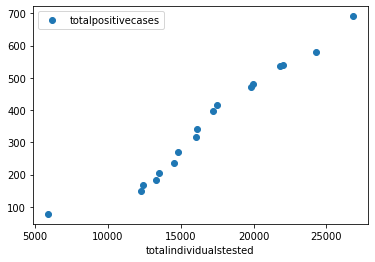

In [6]:
dataset.plot(x='totalindividualstested',y='totalpositivecases',style='o')

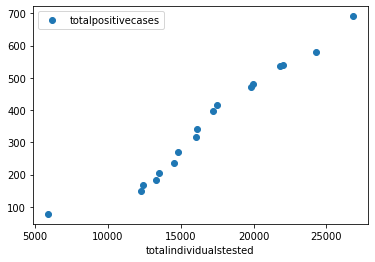

In [7]:
dataset.plot(x='totalindividualstested',y='totalpositivecases',style='o')

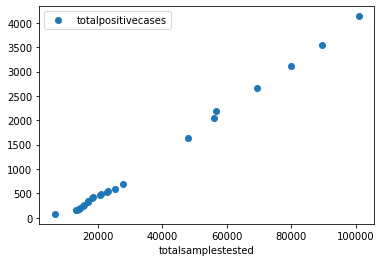

In [8]:
dataset.plot(x='totalsamplestested',y='totalpositivecases',style='o')

In [9]:
X = dataset['totalsamplestested'].values.reshape(-1,1)
y = dataset['totalpositivecases'].values.reshape(-1,1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [11]:
X_train

array([[    nan],
       [ 15404.],
       [ 20707.],
       [ 69245.],
       [ 22694.],
       [ 42788.],
       [ 79950.],
       [    nan],
       [ 13125.],
       [ 18383.],
       [101068.],
       [ 89534.],
       [ 16999.],
       [ 15701.],
       [ 14376.],
       [ 27688.],
       [ 38442.],
       [ 18127.],
       [ 16911.],
       [ 56680.],
       [ 14175.],
       [  6500.],
       [ 47951.],
       [ 25144.],
       [ 20864.]])

In [12]:
y_train

array([[  nan],
       [ 236.],
       [ 471.],
       [2653.],
       [ 536.],
       [  nan],
       [3113.],
       [  nan],
       [ 150.],
       [ 415.],
       [4135.],
       [3554.],
       [ 341.],
       [ 271.],
       [ 206.],
       [ 691.],
       [  nan],
       [ 396.],
       [ 315.],
       [2183.],
       [ 182.],
       [  78.],
       [1637.],
       [ 581.],
       [ 482.]])

In [13]:
y_train

array([[  nan],
       [ 236.],
       [ 471.],
       [2653.],
       [ 536.],
       [  nan],
       [3113.],
       [  nan],
       [ 150.],
       [ 415.],
       [4135.],
       [3554.],
       [ 341.],
       [ 271.],
       [ 206.],
       [ 691.],
       [  nan],
       [ 396.],
       [ 315.],
       [2183.],
       [ 182.],
       [  78.],
       [1637.],
       [ 581.],
       [ 482.]])

In [15]:
cleanedList = [x for x in y_train if x != 'nan']

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [16]:
cleanedList

[array([nan]),
 array([236.]),
 array([471.]),
 array([2653.]),
 array([536.]),
 array([nan]),
 array([3113.]),
 array([nan]),
 array([150.]),
 array([415.]),
 array([4135.]),
 array([3554.]),
 array([341.]),
 array([271.]),
 array([206.]),
 array([691.]),
 array([nan]),
 array([396.]),
 array([315.]),
 array([2183.]),
 array([182.]),
 array([78.]),
 array([1637.]),
 array([581.]),
 array([482.])]

In [17]:
type(y_train)

numpy.ndarray

In [18]:
y_train2 = y_train[~np.isnan(y_train)]

In [19]:
y_train2

array([ 236.,  471., 2653.,  536., 3113.,  150.,  415., 4135., 3554.,
        341.,  271.,  206.,  691.,  396.,  315., 2183.,  182.,   78.,
       1637.,  581.,  482.])

In [20]:
dataset = dataset.dropna(axis=0, subset=['totalpositivecases'])

In [21]:
dataset

,_ckd7g,source,testsconductedbyprivatelabs,totalindividualstested,totalpositivecases,totalsamplestested,updatetimestamp
0,600.0,Press_Release_ICMR_13March2020.pdf,NaN,5900.0,78.0,6500.0,13/3/2020 00:00
1,890.0,ICMR_website_update_18March_6PM_IST.pdf,NaN,12235.0,150.0,13125.0,18/3/2020 18:00
2,890.0,ICMR_website_update_19March_10AM_IST_V2.pdf,NaN,12426.0,168.0,13316.0,19/3/2020 10:00
3,890.0,ICMR_website_update_19March_6PM_IST.pdf,NaN,13285.0,182.0,14175.0,19/3/2020 18:00
4,890.0,ICMR_website_update_20March_10AM_IST.pdf,NaN,13486.0,206.0,14376.0,20/3/2020 10:00
5,890.0,ICMR_website_update_20March_6PM_IST.pdf,NaN,14514.0,236.0,15404.0,20/3/2020 18:00
6,890.0,ICMR_website_update_21March_10AM_IST.pdf,NaN,14811.0,271.0,15701.0,21/3/2020 10:00
7,890.0,ICMR_website_update_21March_6PM_IST.pdf,NaN,16021.0,315.0,16911.0,21/3/2020 18:00
8,890.0,ICMR_website_update_22March_10AM_IST.pdf,NaN,16109.0,341.0,16999.0,22/3/2020 10:00
9,890.0,ICMR_website_update_22March_6PM_IST.pdf,NaN,17237.0,396.0,18127.0,22/3/2020 18:00


In [22]:
X = dataset['totalsamplestested'].values.reshape(-1,1)
y = dataset['totalpositivecases'].values.reshape(-1,1)

In [23]:
X

array([[  6500.],
       [ 13125.],
       [ 13316.],
       [ 14175.],
       [ 14376.],
       [ 15404.],
       [ 15701.],
       [ 16911.],
       [ 16999.],
       [ 18127.],
       [ 18383.],
       [ 20707.],
       [ 20864.],
       [ 22694.],
       [ 22928.],
       [ 25144.],
       [ 27688.],
       [ 47951.],
       [ 55851.],
       [ 56680.],
       [ 69245.],
       [ 79950.],
       [ 89534.],
       [101068.]])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [25]:
X_train

array([[ 22928.],
       [ 69245.],
       [ 13125.],
       [ 22694.],
       [101068.],
       [ 27688.],
       [ 16999.],
       [ 15701.],
       [ 47951.],
       [ 14376.],
       [ 13316.],
       [ 15404.],
       [ 55851.],
       [ 18127.],
       [ 16911.],
       [ 56680.],
       [ 14175.],
       [  6500.],
       [ 79950.],
       [ 25144.],
       [ 20864.]])

In [26]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)


[-437.39258122]
[[0.04466337]]


In [30]:
y_pred = regressor.predict(X_test)

In [31]:
y_pred

array([[ 487.45189677],
       [ 383.65421643],
       [3561.49791437]])

In [32]:
X_test

array([[20707.],
       [18383.],
       [89534.]])

In [35]:
y_pred,X_test

(array([[3135.67731007]]), array([[20707.],
        [18383.],
        [89534.]]))

In [36]:
y_pred = regressor.predict([[80000.]])

In [37]:
y_pred

array([[3135.67731007]])